In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


The real data lies in the filenames and target attributes. The target attribute is the integer index of the category

It is possible to load only a sub-selection of the categories by passing the list of the categories to load to the sklearn.datasets.fetch_20newsgroups function

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 56121)

In [4]:
vectors.nnz / float(vectors.shape[0])

104.33577868127983

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
newsgroups_test = fetch_20newsgroups(subset='test',
                                     categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred, average='macro')

0.8261809451084721

In [6]:
import numpy as np
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.feature_log_prob_[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: morality people sgi atheism com livesey atheists caltech god keith
comp.graphics: program file thanks polygon com university files 3d image graphics
comp.os.ms-windows.misc: card ax com ms drivers driver files dos file windows
comp.sys.ibm.pc.hardware: isa disk pc com controller bus card ide drive scsi
comp.sys.mac.hardware: duo scsi simms centris monitor se quadra drive apple mac
comp.windows.x: uk application x11r5 xterm widget com server mit motif window
misc.forsale: forsale price condition distribution university new shipping offer 00 sale
rec.autos: university like dealer just oil article engine cars com car
rec.motorcycles: bmw riding ca motorcycle article bikes ride dod com bike
rec.sport.baseball: pitching article com runs games players game team year baseball
rec.sport.hockey: leafs games season players play nhl ca game team hockey
sci.crypt: crypto nsa government escrow keys com chip encryption clipper key
sci.electronics: know radar ground host university ca ci

In [7]:
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
metrics.f1_score(pred, newsgroups_test.target, average='macro')

0.6869563257602898

In [8]:
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
vectors = vectorizer.fit_transform(newsgroups_train.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)

MultinomialNB(alpha=0.01)

In [9]:
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred, average='macro')

0.6800725985192675

In [10]:
import numpy as np
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.feature_log_prob_[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: islam atheists say just religion atheism think don people god
comp.graphics: format looking 3d know program file files thanks image graphics
comp.os.ms-windows.misc: program problem thanks drivers use driver files dos file windows
comp.sys.ibm.pc.hardware: monitor disk thanks pc ide controller bus card scsi drive
comp.sys.mac.hardware: know monitor quadra does simms problem thanks drive apple mac
comp.windows.x: windows xterm x11r5 use application thanks widget motif server window
misc.forsale: asking email price sell new condition shipping 00 offer sale
rec.autos: don ford new good dealer just engine like cars car
rec.motorcycles: don helmet just riding like motorcycle ride bikes dod bike
rec.sport.baseball: braves players pitching hit runs games game baseball team year
rec.sport.hockey: league year nhl games season players play hockey team game
sci.crypt: people use escrow nsa keys government chip clipper encryption key
sci.electronics: good voltage thanks used does know

In [11]:
from sklearn.cluster import KMeans
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1, verbose=0)
model.fit(vectors_test)

KMeans(max_iter=1000, n_clusters=20, n_init=1)

In [12]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % (i+1))
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 1:
 oil
 car
 hot
 engine
 red
 000
 coolant
 overheat
 explodes
 blinds
Cluster 2:
 mb
 external
 drive
 expansion
 keyboard
 vga
 unit
 port
 scanman
 521
Cluster 3:
 partners
 sex
 promiscuity
 cramer
 median
 males
 news
 degrees
 social
 speak
Cluster 4:
 aix
 mjones
 kingston
 donald
 ibm
 jones
 com
 development
 mike
 end
Cluster 5:
 useable
 truely
 guts
 passenger
 antenna
 mere
 female
 cool
 dear
 02
Cluster 6:
 don
 know
 like
 just
 think
 people
 does
 use
 time
 thanks
Cluster 7:
 jaffa
 hebron
 homes
 arabs
 jews
 answer
 arab
 bring
 return
 katz
Cluster 8:
 field
 stick
 homer
 trash
 game
 berkeley
 saturday
 cold
 april
 nntp
Cluster 9:
 chronic
 hepatitis
 persistent
 biopsy
 liver
 patient
 active
 disease
 elevated
 viral
Cluster 10:
 service
 66v
 zeos
 gateway
 2000
 buying
 canada
 terms
 wonder
 value
Cluster 11:
 gm
 moncton
 springfield
 providence
 utica
 binghamton
 breton
 rochester
 fredericton
 baltimore
Cluster 12:
 braves
 fans
 america
 tea

In [13]:
from sklearn.metrics import silhouette_score
# Calculer le score de silhouette
score = silhouette_score(vectors_test, model.labels_, metric='euclidean')

# Afficher le résultat
print("Le score de silhouette est : ", score)

Le score de silhouette est :  -0.01132890636370588


In [14]:
# # Author: Olivier Grisel <olivier.grisel@ensta.org>
# #         Lars Buitinck
# #         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# # License: BSD 3 clause

# from time import time

# import matplotlib.pyplot as plt

# from sklearn.datasets import fetch_20newsgroups
# from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# n_samples = 2000
# n_features = 1000
# n_components = 10
# n_top_words = 20
# batch_size = 128
# init = "nndsvda"


# def plot_top_words(model, feature_names, n_top_words, title):
#     fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
#     axes = axes.flatten()
#     for topic_idx, topic in enumerate(model.components_):
#         top_features_ind = topic.argsort()[-n_top_words:]
#         top_features = feature_names[top_features_ind]
#         weights = topic[top_features_ind]

#         ax = axes[topic_idx]
#         ax.barh(top_features, weights, height=0.7)
#         ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
#         ax.tick_params(axis="both", which="major", labelsize=20)
#         for i in "top right left".split():
#             ax.spines[i].set_visible(False)
#         fig.suptitle(title, fontsize=40)

#     plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
#     plt.show()


# # Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# # to filter out useless terms early on: the posts are stripped of headers,
# # footers and quoted replies, and common English words, words occurring in
# # only one document or in at least 95% of the documents are removed.

# print("Loading dataset...")
# t0 = time()
# data, _ = fetch_20newsgroups(
#     shuffle=True,
#     random_state=1,
#     remove=("headers", "footers", "quotes"),
#     return_X_y=True,
# )
# data_samples = data[:n_samples]
# print("done in %0.3fs." % (time() - t0))

# # Use tf-idf features for NMF.
# print("Extracting tf-idf features for NMF...")
# tfidf_vectorizer = TfidfVectorizer(
#     max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
# )
# t0 = time()
# tfidf = tfidf_vectorizer.fit_transform(data_samples)
# print("done in %0.3fs." % (time() - t0))

# # Use tf (raw term count) features for LDA.
# print("Extracting tf features for LDA...")
# tf_vectorizer = CountVectorizer(
#     max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
# )
# t0 = time()
# tf = tf_vectorizer.fit_transform(data_samples)
# print("done in %0.3fs." % (time() - t0))
# print()

# # Fit the NMF model
# print(
#     "Fitting the NMF model (Frobenius norm) with tf-idf features, "
#     "n_samples=%d and n_features=%d..." % (n_samples, n_features)
# )
# t0 = time()
# nmf = NMF(
#     n_components=n_components,
#     random_state=1,
#     init=init,
#     beta_loss="frobenius",
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=1,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))


# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
# )

# # Fit the NMF model
# print(
#     "\n" * 2,
#     "Fitting the NMF model (generalized Kullback-Leibler "
#     "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
#     % (n_samples, n_features),
# )
# t0 = time()
# nmf = NMF(
#     n_components=n_components,
#     random_state=1,
#     init=init,
#     beta_loss="kullback-leibler",
#     solver="mu",
#     max_iter=1000,
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=0.5,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))

# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     nmf,
#     tfidf_feature_names,
#     n_top_words,
#     "Topics in NMF model (generalized Kullback-Leibler divergence)",
# )

# # Fit the MiniBatchNMF model
# print(
#     "\n" * 2,
#     "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
#     "features, n_samples=%d and n_features=%d, batch_size=%d..."
#     % (n_samples, n_features, batch_size),
# )
# t0 = time()
# mbnmf = MiniBatchNMF(
#     n_components=n_components,
#     random_state=1,
#     batch_size=batch_size,
#     init=init,
#     beta_loss="frobenius",
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=0.5,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))


# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     mbnmf,
#     tfidf_feature_names,
#     n_top_words,
#     "Topics in MiniBatchNMF model (Frobenius norm)",
# )

# # Fit the MiniBatchNMF model
# print(
#     "\n" * 2,
#     "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
#     "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
#     "batch_size=%d..." % (n_samples, n_features, batch_size),
# )
# t0 = time()
# mbnmf = MiniBatchNMF(
#     n_components=n_components,
#     random_state=1,
#     batch_size=batch_size,
#     init=init,
#     beta_loss="kullback-leibler",
#     alpha_W=0.00005,
#     alpha_H=0.00005,
#     l1_ratio=0.5,
# ).fit(tfidf)
# print("done in %0.3fs." % (time() - t0))

# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# plot_top_words(
#     mbnmf,
#     tfidf_feature_names,
#     n_top_words,
#     "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
# )

# print(
#     "\n" * 2,
#     "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
#     % (n_samples, n_features),
# )
# lda = LatentDirichletAllocation(
#     n_components=n_components,
#     max_iter=5,
#     learning_method="online",
#     learning_offset=50.0,
#     random_state=0,
# )
# t0 = time()
# lda.fit(tf)
# print("done in %0.3fs." % (time() - t0))

# tf_feature_names = tf_vectorizer.get_feature_names_out()
# plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [15]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics.cluster import adjusted_rand_score


# Charger les données
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(newsgroups_train.data)

# Effectuer le clustering
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init='auto', verbose=0)
model.fit(X)

# Calculer le score d'homogénéité
score = homogeneity_score(newsgroups_train.target, model.labels_)
scoresil = silhouette_score(X, model.labels_, metric='euclidean')
ari = adjusted_rand_score(newsgroups_train.target, model.labels_)

# Afficher le résultat
print("homogeneity_score", score)
print("silhouette_score", scoresil)
print(f"adjusted_rand_score {ari:.4f}.")

homogeneity_score 0.1902860938451158
silhouette_score 0.008248776735551808
adjusted_rand_score 0.0352.


In [16]:
from sklearn.decomposition import LatentDirichletAllocation

k = 20

#LDA
lda = LatentDirichletAllocation(n_components=k, random_state=42, n_jobs=-1)
lda.fit(X)

#groupes et mots
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    topics.append(f"Topic {topic_idx}: {' | '.join(top_words)}")

print('\n'.join(topics))

Topic 0: armenian | armenians | turkish | turkey | turks | greek | armenia | soviet | million | army
Topic 1: deleted | ibm | model | sound | like | pc | looking | type | know | anybody
Topic 2: windows | file | use | card | using | problem | thanks | files | window | program
Topic 3: key | space | chip | encryption | clipper | keys | data | use | nasa | government
Topic 4: sale | 00 | offer | shipping | condition | price | sell | new | asking | excellent
Topic 5: email | 800 | address | looking | output | edu | chips | hi | university | au
Topic 6: car | cars | sure | ll | think | insurance | just | jewish | oh | like
Topic 7: year | game | don | season | good | hit | team | think | games | just
Topic 8: people | government | israel | gun | state | don | just | think | law | right
Topic 9: drive | scsi | drives | controller | bus | ide | hard | disk | floppy | cd
Topic 10: ground | keyboard | wire | faq | ac | pin | ed | line | ve | got
Topic 11: dod | says | blood | cross | red | cou

In [17]:
lda = LatentDirichletAllocation(n_components=k, random_state=42)
topic_distribution = lda.fit_transform(X)
for doc_idx, doc_topic_distribution in enumerate(topic_distribution):
    top_topics = doc_topic_distribution.argsort()[:-3:-1]  # Display the top 2 topics per document
    topic_probabilities = doc_topic_distribution[top_topics]
    print(f"Document {doc_idx}:")
    for i, (topic, prob) in enumerate(zip(top_topics, topic_probabilities)):
        print(f"Topic {topic}: Probability {prob:.4f}")

Document 0:
Topic 18: Probability 0.6886
Topic 4: Probability 0.1264
Document 1:
Topic 9: Probability 0.4378
Topic 18: Probability 0.3800
Document 2:
Topic 18: Probability 0.4985
Topic 2: Probability 0.3941
Document 3:
Topic 3: Probability 0.5479
Topic 12: Probability 0.1881
Document 4:
Topic 7: Probability 0.5189
Topic 14: Probability 0.2362
Document 5:
Topic 17: Probability 0.8043
Topic 19: Probability 0.0103
Document 6:
Topic 10: Probability 0.4138
Topic 4: Probability 0.3987
Document 7:
Topic 9: Probability 0.7774
Topic 13: Probability 0.0117
Document 8:
Topic 10: Probability 0.4660
Topic 12: Probability 0.2704
Document 9:
Topic 2: Probability 0.7921
Topic 19: Probability 0.0109
Document 10:
Topic 18: Probability 0.4302
Topic 10: Probability 0.2694
Document 11:
Topic 15: Probability 0.8467
Topic 2: Probability 0.0393
Document 12:
Topic 19: Probability 0.0500
Topic 18: Probability 0.0500
Document 13:
Topic 16: Probability 0.8845
Topic 15: Probability 0.0061
Document 14:
Topic 9: Pro

c:\Users\alaja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alaja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alaja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


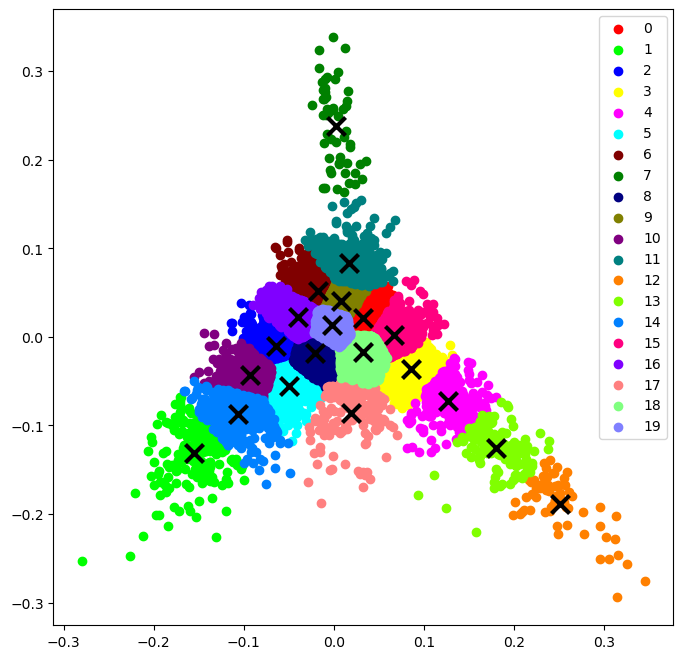

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA 
def bench_k_means(estimator, data, y=None):
    estimator.fit(data)
    scores = [
        "adjusted_rand_score",
        "adjusted_mutual_info_score",
        "silhouette_score",
        "homogeneity_score",
        "completeness_score",
        "v_measure_score",
    ]
    results = []
    for s in scores:
        if s not in ["silhouette_score"]:
            score = getattr(metrics, s)(y, estimator.labels_)
        elif y is not None:
            score = getattr(metrics, s)(data, estimator.labels_)
        else:
            continue
        results.append(score)
    return pd.DataFrame([results], columns=scores, index=["result"])
raw_data = fetch_20newsgroups(shuffle=False,remove=('headers', 'footers', 'quotes'))
data = raw_data.data
y = raw_data.target
K = len(np.unique(y))
tfif = TfidfVectorizer(min_df=2, stop_words='english', analyzer='word')
X = tfif.fit_transform(data)
lsa = TruncatedSVD(n_components=100, random_state=42)
X_lsa = lsa.fit_transform(X)
pca = PCA(2) 
reduced_data = pca.fit_transform(X_lsa)
kmeans_pca = KMeans(init='k-means++',n_clusters=K, random_state=42)
X_kmeans_pca = kmeans_pca.fit_transform(reduced_data)
colors_hex = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#800000",  # Brown
    "#008000",  # Dark Green
    "#000080",  # Dark Blue
    "#808000",  # Dark Yellow
    "#800080",  # Dark Magenta
    "#008080",  # Dark Cyan
    "#FF8000",  # Orange
    "#80FF00",  # Light Green
    "#0080FF",  # Light Blue
    "#FF0080",  # Pink
    "#8000FF",  # Purple
    "#FF8080",  # Light Pink
    "#80FF80",  # Light Green
    "#8080FF"   # Light Blue
]
kmeans_cluster = kmeans_pca.fit_predict(reduced_data) 
centroids = kmeans_pca.cluster_centers_ 
label = kmeans_pca.fit_predict(reduced_data) 
unique_labels = np.unique(label) 
plt.figure(figsize=(8, 8)) 
for i in unique_labels: 
    plt.scatter(reduced_data[label == i, 0], 
                reduced_data[label == i, 1], 
                label=i, c=colors_hex[i]) 
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.legend() 
plt.show() 

In [20]:
centroids.shape

(20, 2)

In [ ]:
evaluation = bench_k_means(kmeans_pca, reduced_data, y)
print(evaluation)

c:\Users\alaja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  \
result             0.066264                    0.220301          0.333429   

        homogeneity_score  completeness_score  v_measure_score  
result            0.21616            0.233963         0.224709  


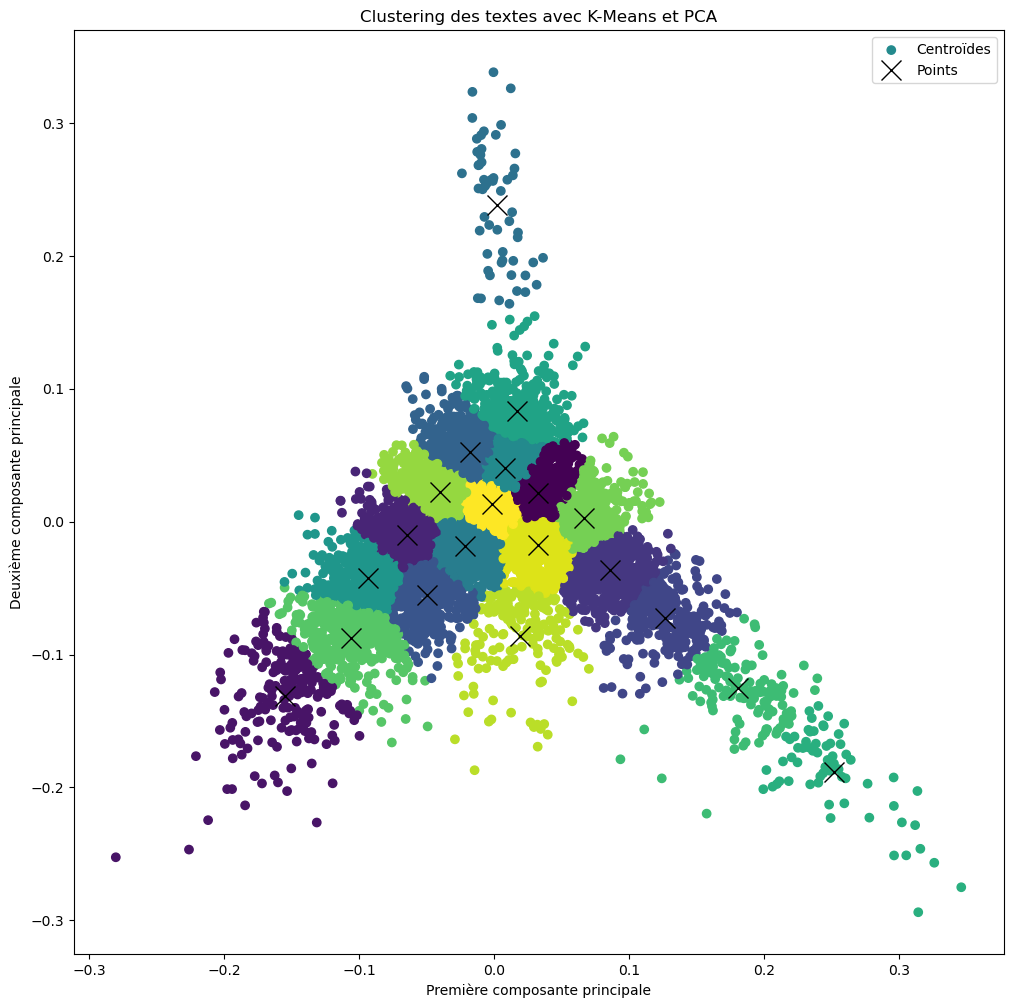

In [51]:
# Importer matplotlib.pyplot
import matplotlib.pyplot as plt

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(12, 12))

# Tracer les points réduits avec les couleurs des clusters
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_cluster)

# Tracer les centroïdes des clusters
ax.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)

# Ajouter des titres et des légendes
ax.set_title('Clustering des textes avec K-Means et PCA')
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.legend(['Centroïdes', 'Points'])

# Afficher le graphique
plt.show()

In [ ]:
reduced_data.shape

(11314, 2)

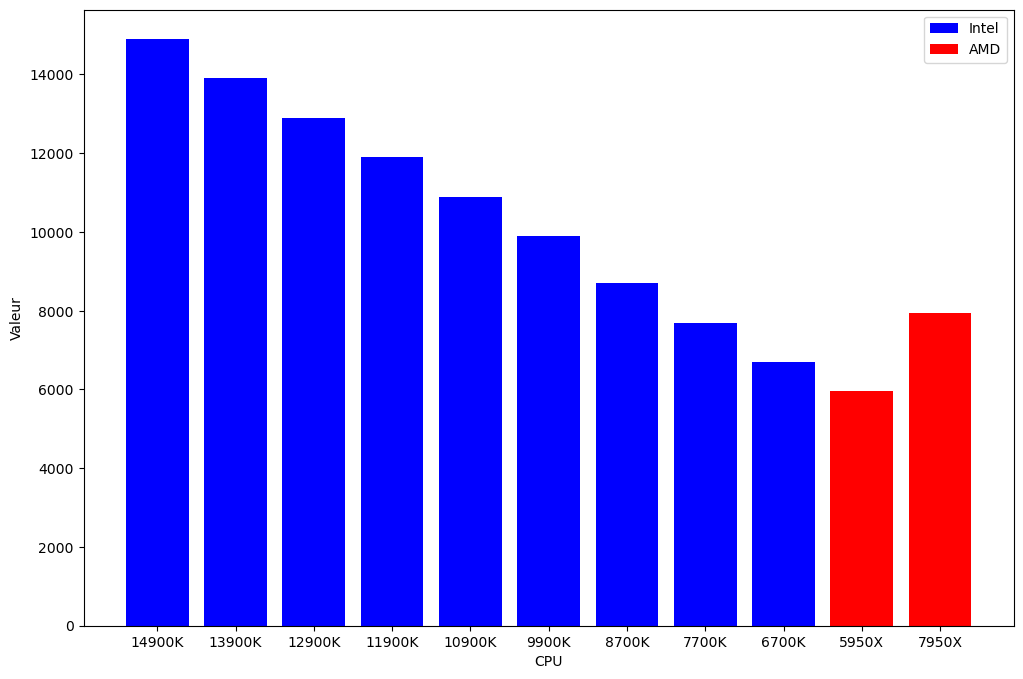

In [50]:
import matplotlib.pyplot as plt
valeursintel = [14900, 13900, 12900, 11900, 10900, 9900, 8700, 7700, 6700]
valeursamd = [5950, 7950]

fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(range(len(valeursintel)), valeursintel, color='b', label='Intel')

bar2 = ax.bar(range(len(valeursintel), len(valeursintel) + len(valeursamd)), valeursamd, color='r', label='AMD')

ax.set_xlabel('CPU')
ax.set_ylabel('Valeur')

ax.set_xticks(range(len(valeursintel) + len(valeursamd)))
ax.set_xticklabels([f'{v}K' for v in valeursintel] + [f'{v}X' for v in valeursamd])

ax.legend([bar1, bar2], ['Intel', 'AMD'])

plt.show()

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

Temps écoulé : 717.43 secondes


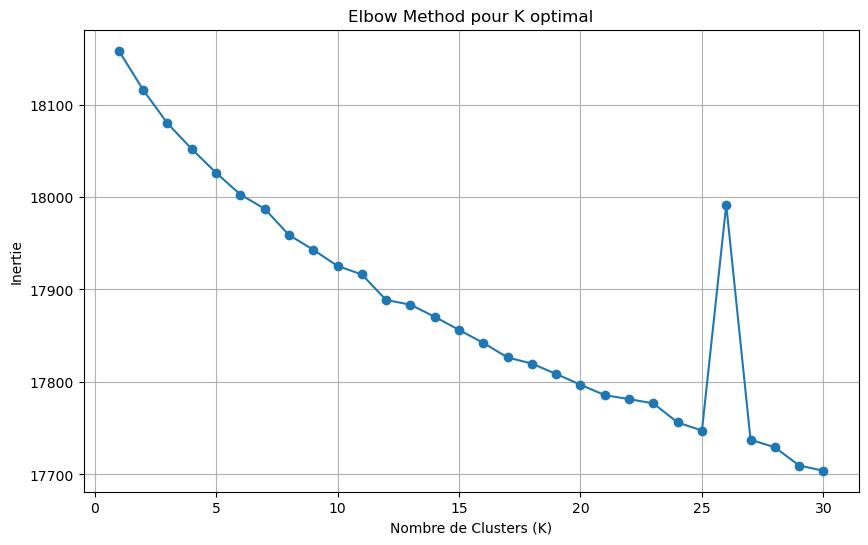

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups_data.data)

inertias = []

start_time = time.time()

for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

end_time = time.time()
elapsed_time = end_time - start_time

print("Temps écoulé : {:.2f} secondes".format(elapsed_time))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), inertias, marker='o', linestyle='-')
plt.title('Elbow Method pour K optimal')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

In [12]:
tfidf_matrix.shape

(18846, 134101)

In [10]:
len(newsgroups_data.data)

18846

In [4]:
type(newsgroups.data)

list

In [5]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per